# PART 1

## DATA PREPROCESSING

In [ ]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data_1 = train_data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
test_data_1 = test_data.drop(['Ticket', 'Cabin'], axis=1)

In [ ]:
train_data_1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [ ]:
test_data_1.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
train_data_1.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
train_data_1['Embarked'].mode()[0]

'S'

In [ ]:
train_data_1['Embarked'] = train_data_1['Embarked'].fillna(train_data_1['Embarked'].mode()[0])

In [ ]:
test_data_1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test_data_1['Fare'] = test_data_1['Fare'].fillna(test_data_1['Fare'].median())

In [ ]:
train_data_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data_1['Age'] = train_data_1['Age'].fillna(train_data_1['Age'].median())
test_data_1['Age'] = test_data_1['Age'].fillna(test_data_1['Age'].median())

In [ ]:
train_data_1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
train_data_1['Title'] = train_data_1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data_1['Title'] = test_data_1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
train_data_2 = train_data_1.drop('Name', axis=1)
test_data_2 = test_data_1.drop('Name', axis=1)

In [ ]:
train_data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
train_data_2['Sex'] = train_data_2['Sex'].map({'male': 0, 'female': 1})
test_data_2['Sex'] = test_data_2['Sex'].map({'male': 0, 'female': 1})

In [ ]:
train_data_2['Embarked'] = train_data_2['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data_2['Embarked'] = test_data_2['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
train_data_2['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
test_data_2['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [ ]:
train_data_2['Title'] = train_data_2['Title'].replace(['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Ms', 'Mme', 'Don', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer'], 'Rare')
test_data_2['Title'] = test_data_2['Title'].replace(['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Ms', 'Mme', 'Don', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer', 'Dona'], 'Rare')

In [ ]:
train_data_2['Title'] = train_data_2['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
test_data_2['Title'] = test_data_2['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

In [ ]:
train_data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,0


In [ ]:
X = train_data_2.drop('Survived', axis=1)

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,2
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,2
4,3,0,35.0,0,0,8.0500,0,0


In [ ]:
y = train_data_2['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(712, 8)

# PART 2

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_val_pred = log_reg.predict(X_val)

In [ ]:
y_val_pred[:5]

array([0, 0, 0, 1, 1])

In [ ]:
y_val.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [ ]:
from sklearn.metrics import accuracy_score

log_accuracy = accuracy_score(y_val, y_val_pred)
log_accuracy

0.7821229050279329

In [ ]:
from sklearn.metrics import  confusion_matrix

log_conf = confusion_matrix(y_val, y_val_pred)
log_conf

array([[86, 19],
       [20, 54]])

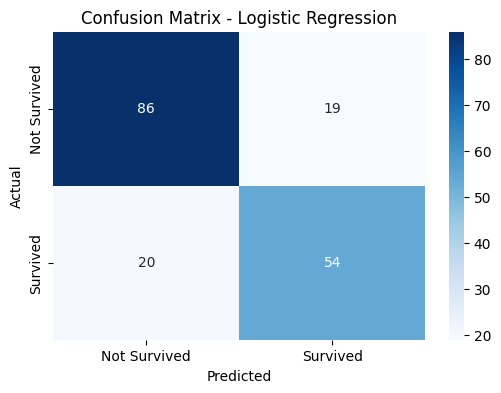

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.heatmap(log_conf, annot=True, fmt='d', cmap='Blues',xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
test_data_2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,0
1,893,3,1,47.0,1,0,7.0000,0,2
2,894,2,0,62.0,0,0,9.6875,2,0
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,2


In [ ]:
X_inputs_test_data = test_data_2.drop('PassengerId', axis=1)

In [ ]:
X_inputs_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,2
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,2


In [ ]:
y_test_pred = log_reg.predict(X_inputs_test_data)

In [ ]:
y_test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
logistic_submission = pd.DataFrame({
    'PassengerId': test_data_2['PassengerId'],
    'Survived': y_test_pred
})

In [ ]:
logistic_submission.to_csv('Logist_submission.csv', index=False)

## Decisioin Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_model = DecisionTreeClassifier(random_state=42)

In [ ]:
dec_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dec_val = dec_model.predict(X_val)

In [ ]:
acc_dec = accuracy_score(y_val, y_pred_dec_val)

acc_dec

0.7877094972067039

In [ ]:
dec_conf = confusion_matrix(y_val, y_val_pred)
dec_conf

array([[86, 19],
       [20, 54]])

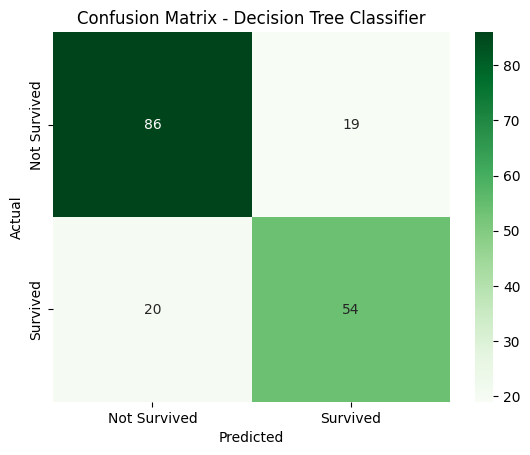

In [ ]:
sns.heatmap(dec_conf, annot=True, fmt='d', cmap='Greens',xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_pred_test_dec = dec_model.predict(X_inputs_test_data)
y_pred_test_dec

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
decision_submission = pd.DataFrame({
    'PassengerId': test_data_2['PassengerId'],
    'Survived': y_pred_test_dec
})

In [ ]:
decision_submission.to_csv('Decision_submission.csv', index=False)

## K Nearest Neighbour

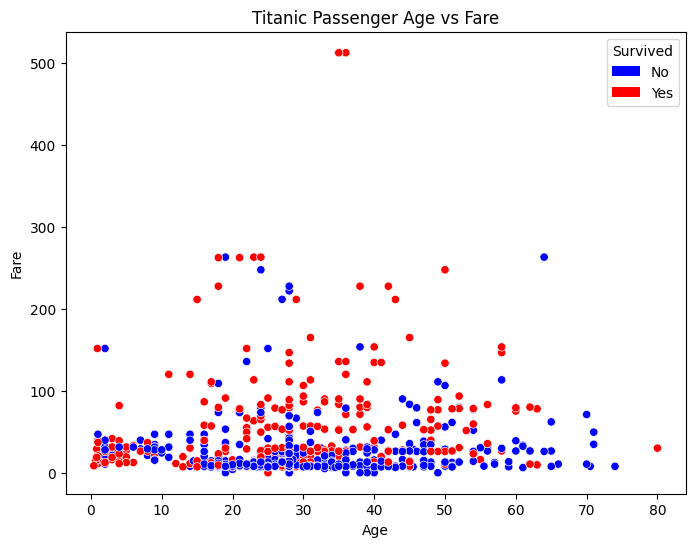

In [ ]:
plt.figure(figsize=(8, 6))
palette = {"0": "blue", "1": "red"}
sns.scatterplot(data=train_data_2, x="Age", y="Fare", hue=train_data_2['Survived'].astype(str), palette=palette)

plt.title("Titanic Passenger Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='No'),
    Patch(facecolor='red', label='Yes')
]
plt.legend(title="Survived", handles=legend_elements)

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_val_knn = knn.predict(X_val)

In [ ]:
acc_knn = accuracy_score(y_val, y_pred_val_knn)

In [ ]:
acc_knn

0.7206703910614525

In [ ]:
y_pred_test_knn = knn.predict(X_inputs_test_data)

In [ ]:
knn_submission = pd.DataFrame({
    'PassengerId': test_data_2['PassengerId'],
    'Survived': y_pred_test_dec
})

In [ ]:
knn_submission.to_csv('KNN_submission.csv', index=False)

## SVM algorithm

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', random_state=42)

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_val_pred_svm = svm_clf.predict(X_val)

In [ ]:
acc_svm = accuracy_score(y_val, y_val_pred_svm)

In [ ]:
acc_svm

0.664804469273743

In [ ]:
y_pred_test_svm = svm_clf.predict(X_inputs_test_data)

In [ ]:
svm_submission = pd.DataFrame({
    'PassengerId': test_data_2['PassengerId'],
    'Survived': y_pred_test_svm
})

In [ ]:
svm_submission.to_csv('SVM_submission.csv', index=False)

## Random Forest Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_val_pred_rf = rf.predict(X_val)

In [ ]:
acc_rf = accuracy_score(y_val, y_val_pred_rf)

acc_rf

0.8324022346368715

In [ ]:
y_pred_test_rf = rf.predict(X_inputs_test_data)

In [ ]:
rf_submission = pd.DataFrame({
    'PassengerId': test_data_2['PassengerId'],
    'Survived': y_pred_test_rf
})

In [ ]:
rf_submission.to_csv('RF_submission.csv', index=False)